In [7]:
# Read dataset and split to train and test data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the csv file to pandas dataframe
dataset = pd.read_csv('assets/output/preprocessedDataset.csv')

# Split the dataset to X and Y
Y = dataset.loc[:,'visitor']
X = dataset.drop(['date','visitor'], axis=1)


# Split the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
# Make the Model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': np.arange(50,1000, 50),
            'max_depth': np.arange(1,10,1),
            'min_samples_split': np.arange(2,10,1),
            'learning_rate': np.arange(0.01,1,0.05),
            'loss': ['squared_error']}

model = GradientBoostingRegressor(random_state=0)

grid_mdoel = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1)

In [9]:
# Fit the model
from sklearn.metrics import mean_squared_error


grid_mdoel.fit(X_train, Y_train)

print('최적 하이퍼 파라미터:\n', grid_mdoel.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_mdoel.best_score_))

# Make the model with best parameters
model = GradientBoostingRegressor(**grid_mdoel.best_params_)
model.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, model.predict(X_test))
print("MSE: %.4f" % mse)

print(model.score(X_test, Y_test))

KeyboardInterrupt: 

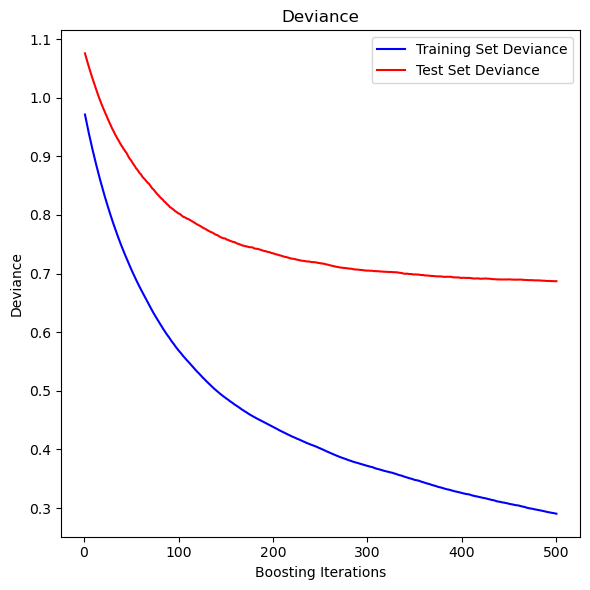

In [ ]:
test_score = np.zeros((grid_mdoel.best_params_["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = mean_squared_error(Y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(grid_mdoel.best_params_["n_estimators"]) + 1,
    model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(grid_mdoel.best_params_["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

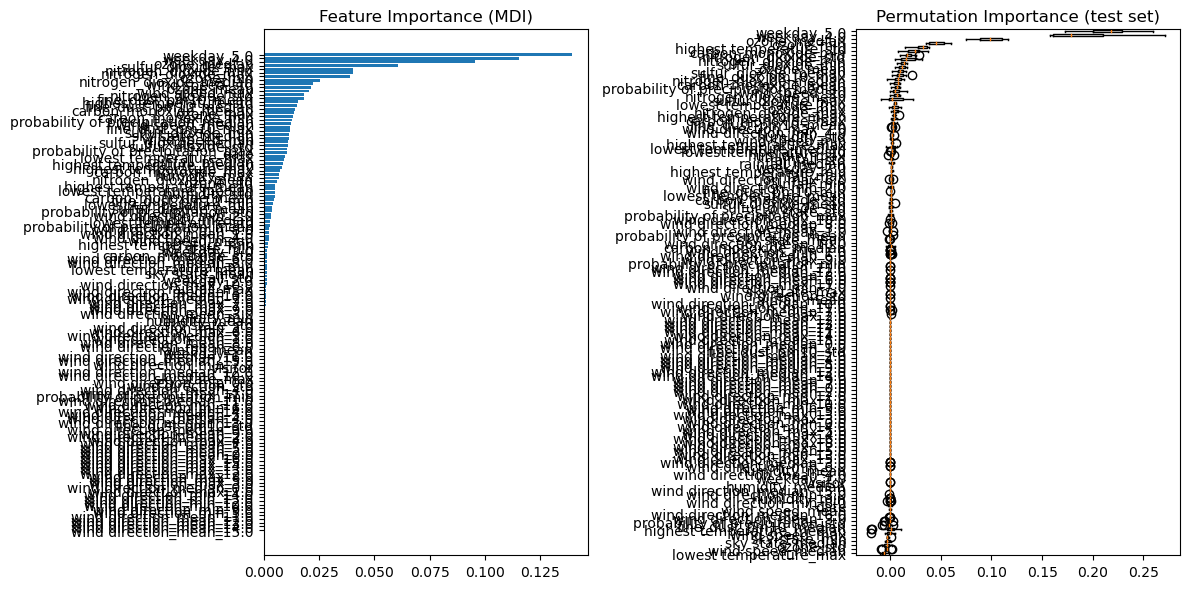

In [ ]:
from sklearn.inspection import permutation_importance


feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(dataset.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(dataset.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [ ]:
reduced_X = X_train.iloc[:, sorted_idx[100:]]

model = GradientBoostingRegressor(**grid_mdoel.best_params_)
model.fit(reduced_X, Y_train)

print(model.score(X_test.iloc[:, sorted_idx[100:]], Y_test))

0.37684605524412684
